In [6]:
import pandas as pd
import numpy as np

In [7]:
#opening and reading the first 4 entries of the sheet
df = pd.read_csv('beep.csv')
df.tail()

,ID,Gender,Marital Status,Work Status,Education,Annual Income (x1000 $),Age,Location,Purchasing Decision-maker,Purchasing Location,Monthly Electronics Spend,Monthly Household Spend,Purchasing Frequency (every x months),Technology Adoption,TV Viewing (hours/day),Favorite feature
997,998.0,male,married,professional,none,28.00,65.00,Georgia,single,discount,10.0,29.0,11.0,early,1.0,schedule control
998,999.0,male,married,none,BA,49.00,67.00,Maine,family,mass-consumer electronics,41.0,55.0,23.0,late,10.0,saving favorite shows to watch as a family
999,1000.0,female,married,professional,none,33.00,58.00,Tennessee,single,retail,23.0,104.0,1.0,early,1.0,cool gadget
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,#REF!,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#cleaning data, need to remove the last to empty cells, drop redundent ID column
df = df.drop('ID', axis=1)
df.drop(df.tail(2).index,inplace=True)
df.tail()





,Gender,Marital Status,Work Status,Education,Annual Income (x1000 $),Age,Location,Purchasing Decision-maker,Purchasing Location,Monthly Electronics Spend,Monthly Household Spend,Purchasing Frequency (every x months),Technology Adoption,TV Viewing (hours/day),Favorite feature
995,female,single,professional,none,29.00,51.00,Florida,family,retail,15.0,54.0,21.0,early,2.0,schedule control
996,male,married,professional,MA,32.00,73.00,Maine,single,retail,15.0,73.0,21.0,early,0.0,schedule control
997,male,married,professional,none,28.00,65.00,Georgia,single,discount,10.0,29.0,11.0,early,1.0,schedule control
998,male,married,none,BA,49.00,67.00,Maine,family,mass-consumer electronics,41.0,55.0,23.0,late,10.0,saving favorite shows to watch as a family
999,female,married,professional,none,33.00,58.00,Tennessee,single,retail,23.0,104.0,1.0,early,1.0,cool gadget


In [ ]:
#Q1

#insert one row above the column labels and categorize each data field by its segmentation paratmter type: 
#demographic, purchasing, behavioral, attitude, or other

#Demographics: Gender, Marital, Work, Edu, Age, Location, Income 
#Purchasing: Descion Maker, P Location, Spending
#Behavioral: P Freq, TV Viewing, Tech adoption
#Attitude: Fav Feature

#cosmetic, if you run first will ruin other code

segments = ['Demographic','Purchasing','Behavioral','Attitude','Other']

new_row = pd.DataFrame({'Gender':segments[0],
                        'Marital Status':segments[0],
                        'Work Status':segments[0],
                        'Location':segments[0],
                        'Age':segments[0],
                        'Education':segments[0],
                        'Annual Income (x1000 $)':segments[0],
                        'Purchasing Decision-maker':segments[1],
                        'Purchasing Location':segments[1],
                        'Monthly Electronics Spend':segments[1],
                        'Monthly Household Spend':segments[1],
                        'Purchasing Frequency (every x months)':segments[2],
                        'Technology Adoption':segments[2],
                        'TV Viewing (hours/day)':segments[2],
                        'Favorite feature':segments[3],
                        
                


                       
                       
                       
                       
                       
                }, index=[0])
df = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
df.head()

In [ ]:
#Q2

#Insert a column that calculates annual spending on electronics and another that is spending as % of income
df['Age'] = df['Age'].astype(float)
df["Annual Income (x1000 $)"] = df["Annual Income (x1000 $)"].astype(float) 

df["Annual Spending on Electronics"] = df['Monthly Electronics Spend'] * 12
                                      
df["Electronic spending as % of income"] = df['Annual Spending on Electronics'] /(df['Annual Income (x1000 $)'] *1000)
df['Spending as % of income'] = df['Annual Spending on Electronics']/(df['Annual Income (x1000 $)']*1000)

pd.to_numeric(df['Annual Income (x1000 $)']) # convert col from string to float
df2 = df["Annual Income (x1000 $)"].mean()
print(df2)
df['Annual Income (x1000 $)'].info


In [ ]:
#Q3A create a table for each attribute and record the % of answer for each answer

discrete_values = ["Gender", "Marital Status", "Work Status", "Education", "Location", "Purchasing Location", "Favorite feature","Technology Adoption","Purchasing Decision-maker"]

for i in range(len(discrete_values)):


    count = df[discrete_values[i]].value_counts()
    percentage = (count/len(df))*100
    print("\n", percentage)


  

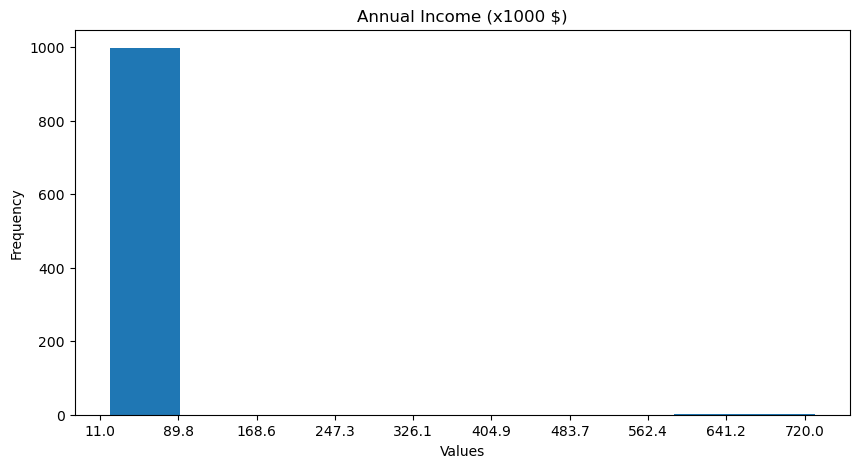

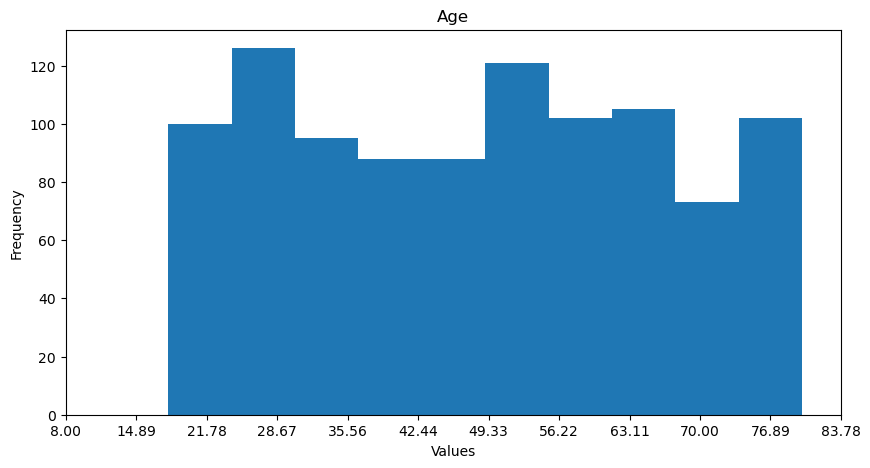

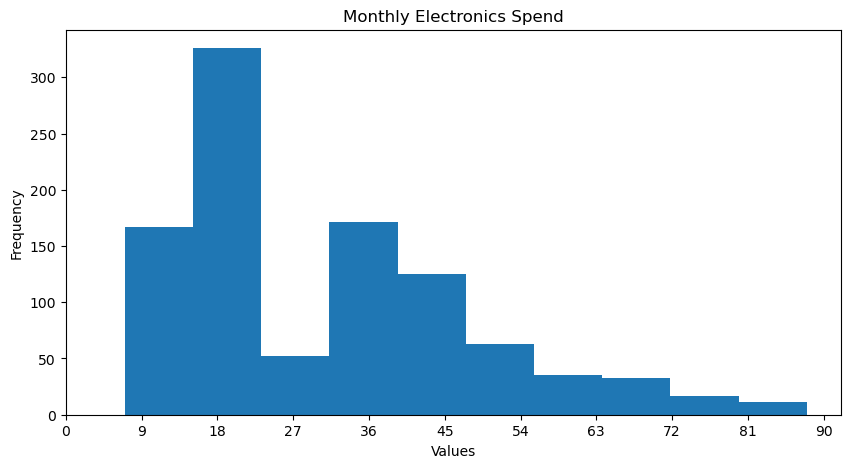

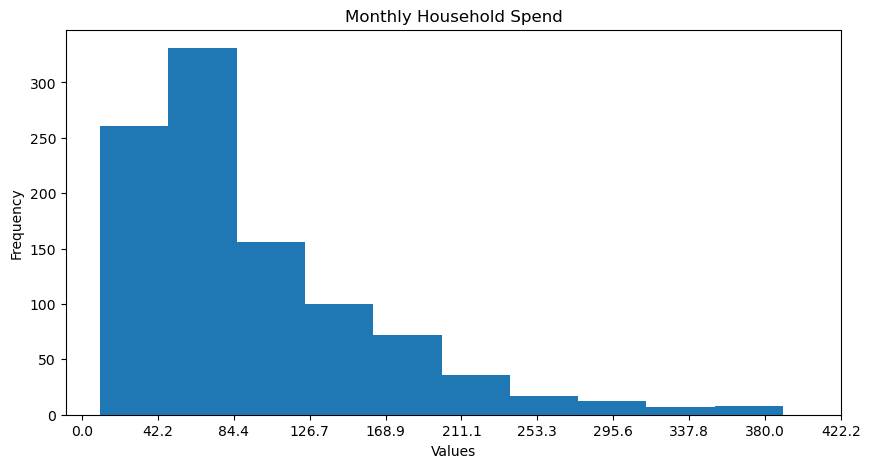

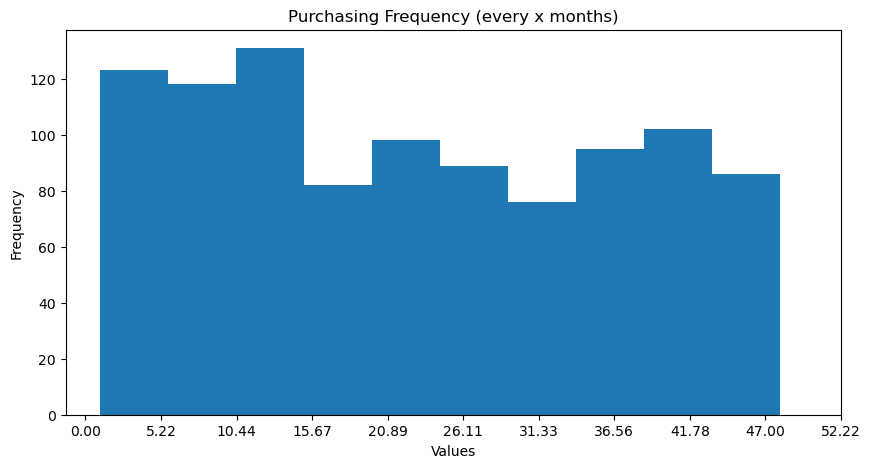

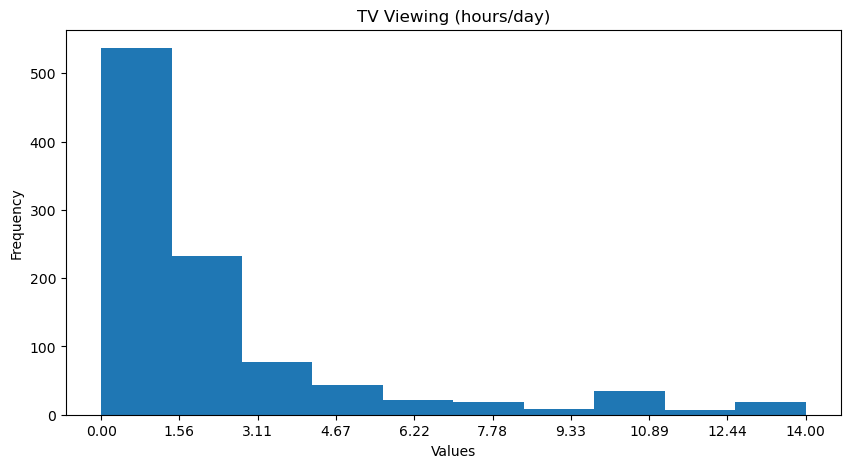

In [10]:


import matplotlib.pyplot as plt
import numpy as np
df['Age'] = df['Age'].astype(float)
df["Annual Income (x1000 $)"] = df["Annual Income (x1000 $)"].astype(float) 
continous_values = ["Annual Income (x1000 $)", "Age","Monthly Electronics Spend", "Monthly Household Spend", "Purchasing Frequency (every x months)", "TV Viewing (hours/day)"]

for i in range(len(continous_values)):
    column_name = continous_values[i]
    
    # Lower limit
    x = 0
    if df[column_name].min() - 10 < 0:
        x = 0
    else:
        x = df[column_name].min() - 10

    # Upper limit
    y = df[column_name].max() + df[column_name].std() / 2

    # Space between values
    z = (df[column_name].max() - df[column_name].min()) / 9
        
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=10)
    plt.xticks(np.arange(x, y, z, dtype=float))
    plt.title(column_name)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
   # plt.title(continous_values[i])
    plt.show()

In [ ]:
#Q4A: a. How many married men who are early adopters can afford to purchase a TiVo for $499 and on average have enough money to
#purchase another electronic gadget in the next two years ?

#assuming average electronic is also $500, which means they buy 2 electronics = $1000 over 3 years
#annual spending on electronic > 333.33



q4a = df[

(df["Gender"]=="male")
&
(df["Marital Status"]=="married")
&
(df["Technology Adoption"]=='early')
&   
(df["Monthly Electronics Spend"]*12 >=333.33)   
]

length_of_list4a = len(q4a)
print(length_of_list4a)




In [ ]:
#Q4B: b. How many women with education of MA or PhD are making purchasing decisions for electronics without discussing them 
#with a spouse, either because they are single, or because they are making purchasing decisions without the involvement of 
#their spouses?

q4b = df[
    
(df["Gender"]=="female")
&
((df["Marital Status"]=="single") | (df["Purchasing Decision-maker"]=="single"))
&
((df["Education"]=='MA')   | (df["Education"]=='PhD'))

]

length_of_list4b = len(q4b)
print(length_of_list4b)

In [ ]:
#Q4C Among early adopters, how many purchase electronics at least once every year and do so in stores that specialize 
#in electronics?

q4c = df[
(df["Technology Adoption"]=='early')
&
(df["Purchasing Frequency (every x months)"] <=12)
&
(df["Purchasing Location"] == 'specialty stores')
]


length_of_list4c = len(q4c)
print(length_of_list4c)



In [ ]:
#Q4D d. How many seniors (above the age of 65) spend more than six hours a day watching TV? 
#What is their income range? What is their average annual income?

#doesn't work cause age fucky wucky

q4d = df[

(df["Age"] >65)
&(df["TV Viewing (hours/day)"]>6)
    
    
]

length_of_list4d = len(q4d)
print(length_of_list4d)

print("Income Range:", q4d["Annual Income (x1000 $)"].min(),",", q4d["Annual Income (x1000 $)"].max())
print("Average Income:",q4d["Annual Income (x1000 $)"].mean())

In [ ]:
#Q5 Correlate Annual income with Age.



q5 = df.loc[:, ['Age', 'Annual Income (x1000 $)']]

a, b = "Age", "Annual Income"
corr = q5['Age'].corr(q5['Annual Income (x1000 $)'])
print("Correlation between", a, "and", b, "is:", round(corr, 2)**2)

In [ ]:
#q6 What is the correlation between Gender and Annual income?
#this use to work i broke it lmao

#create a new column GenderDummy that is 1 for male 0 for female 



GenderDummy = df["Gender"].copy()

for i in range(len(GenderDummy)):
    if GenderDummy[i] == "male":
        GenderDummy[i] = 1
    elif GenderDummy[i] == "female":
        GenderDummy[i] = 0
        
df['GenderDummy'] = GenderDummy
df['GenderDummy'] = df['GenderDummy'].astype(int)
q5 = df.loc[:, ['GenderDummy', 'Annual Income (x1000 $)']]


corr = q5['GenderDummy'].corr(q5['Annual Income (x1000 $)'])
print("Correlation between Gender and Annual Income is:", round(corr, 2)**2)


In [ ]:
#q7 More correlation, try creating correlation heatmap?
import seaborn as sns
data_corr = df.corr(method='pearson')**2


plt.figure(figsize=(10,10), dpi=100)
plt.title("Correlation Heatmap (without outliers) for Quantitative Metrics")
sns.set(font_scale=1.4)
sns.heatmap(data_corr,
            annot=True,
            annot_kws={"size": 10},
            square=True)
plt.yticks(rotation=0) 

In [ ]:
#Q8 Segment the market and find statistics on each segment


def create_segment_stats(seg, desc = ''):
   

    market_size = len(seg)/len(df)
    avg_ann_income = seg['Annual Income (x1000 $)'].mean() 
    desc = desc
    fave_feature = seg['Favorite feature'].mode()[0]
    edu = seg['Education'].mode()
    avg_elec_purchase = seg['Annual Spending on Electronics'].mean() 
    
    
    return [market_size, avg_ann_income, desc, fave_feature, avg_elec_purchase,edu]

In [ ]:
location_segs = {
'specialty stores': create_segment_stats(df[df['Purchasing Location'] =="specialty stores"], 'Niche stores'),
'mass-consumer electronics': create_segment_stats(df[df['Purchasing Location'] =="mass-consumer electronics"], 'Best Buy'),
'retail': create_segment_stats(df[(df['Purchasing Location'] == "retail")] , 'Retail Stores e.g Winners'),
'discount': create_segment_stats(df[(df['Purchasing Location'] == "discount")], 'Discount stores e.g thrift stores'),
'web (ebay)': create_segment_stats(df[(df['Purchasing Location'] == 'web (ebay)')], 'Online retailers e.g ebay')
}

In [ ]:
#automated version of the one above ^^
seg = df['Purchasing Location'].unique()
bubby_segs = {}

for i in range(len(seg)):
    bubby_segs[seg[i]] = create_segment_stats(df[df['Purchasing Location'] == seg[i]], "l")

In [ ]:
# show full response without truncating
pd.set_option('display.max_colwidth', -1)

index = ['Market Size (% of TV Involved Households)','Average Annual Income','Description',
        'Most Appealing Feature/Benefit','Average Electronics Purchase','Education']

location_df = pd.DataFrame(location_segs, index = index)
location_df.round(2)